### Domain Knowledge

We will use the customer dataset of a telecom company to see the application of KNN. The dataset was collected from IBM BigData University. This dataset is divided into four classes based on address, age, marital status, age of employment, gender, income, etc. of customers or phone users of telecom companies. The classes are: 1. Basic Service 2- E-Service 3-Plus Service and 4-Total Service. Your job will be to predict what class a new person will be a customer of this company

### importing libraries and dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [48]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-telecom-customer.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Set target variables and feature variables

In [49]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] 
y = df['custcat']

### Now I will keep 25% data for test and train the model with the remaining data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


##### At the beginning of the code, we will define a range; that is, our program will find the optimal value of K within the minimum and maximum limits based on this range.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.296, 0.284, 0.308, 0.296, 0.32, 0.348, 0.34, 0.332, 0.316, 0.34, 0.324, 0.352, 0.328, 0.328, 0.332, 0.348, 0.356, 0.344, 0.352, 0.352, 0.36, 0.336, 0.34, 0.352, 0.34]


Text(0, 0.5, 'Testing Accuracy')

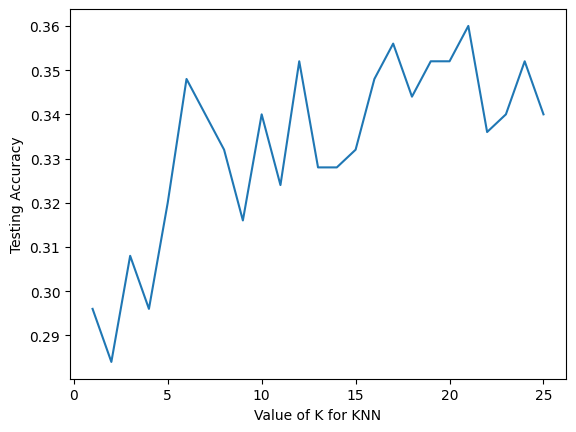

In [53]:
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

##### The figure above shows the accuracy of the model for different values of k. When the value of K is 3, the accuracy increases, and when it comes to 4, it decreases. Thus, the accuracy of the model sometimes increases and sometimes decreases for different values of k. We can see that the accuracy is roughly at its maximum when the value of k is 7. So we set the value of K to 7 for this dataset.

## Taking the value of K as 7, we construct the k-nearest neighbors model

In [54]:
k = 7
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

### Our model is ready. Now we check the accuracy

In [55]:
predictions = neigh.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.53      0.44        70
           2       0.25      0.23      0.24        53
           3       0.40      0.33      0.36        69
           4       0.28      0.22      0.25        58

    accuracy                           0.34       250
   macro avg       0.33      0.33      0.32       250
weighted avg       0.33      0.34      0.33       250



In [56]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[37 11 14  8]
 [18 12 13 10]
 [17 14 23 15]
 [26 11  8 13]]


In [57]:
print("Accuracy Score:\n", accuracy_score(y_test, predictions))

Accuracy Score:
 0.34


We can see that our model can predict with 34% accuracy. As a model, this value is not very good!

### Let's predict which class the new customer will be in

In [58]:
new_observation = [[2,11,0,22,0,1,40,3,5,0,1]]
neigh.predict(new_observation)

C:\Users\SK\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

We see our new Customer 1, i.e., Basic Service class.